In [16]:


###%%! Steps
## "1. Original Data [only add NO modifications]"
## "2. Prepared Data"
## "3. Uploaded/Load Data" to postgres DB
## "4. Analysis [codes and scripts]"
## "5. Insights [prelim insights]"
## "6. Final Report"


## "1. Original Data [only add NO modifications]" -- EXTRACT
# import psycopg2
import requests
import json
import pandas as pd
import os
import datetime


API_KEY = "YOUR_API_KEY"
#### List of US securities tickers

aListOfTickers = ["INDA", "INCO"]

### HISTORICAL PRICES via Alpha Vantage API
## U.S. Stock Markets
# def getApiUrl(aListOfTickers):
for ticker in aListOfTickers:
#     print("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=" + ticker + "&outputsize=full&apikey=" + API_KEY)
#     print("url_" + ticker)
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=" + ticker + "&outputsize=full&apikey=" + API_KEY
    
    r = requests.get(url) # Call API
    
    try:
        json = r.json() # Convert Response object into json object
    except ValueError:
        print("No JSON object could be decoded")

    # Check raw data
    for key, value in json.items():
#         print(key + ':', value)
        continue;

    
    
    


    
# url_smin = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SMIN&apikey=N5HXNYMKB17SUFKT"
# url_inco = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INCO&apikey=N5HXNYMKB17SUFKT"
# url_inda = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INDA&outputsize=full&apikey=N5HXNYMKB17SUFKT"

## Indian Stock Market (Alpha Vantage API for NSE not accurate)
# df_SETFNIF50_2017_2019 = pd.read_csv("./1. Original Data [only add NO modifications]/06-02-2017-TO-05-02-2019SETFNIF50ALLN.csv")
# df_SETFNIF50_2016_2017 = pd.read_csv("./1. Original Data [only add NO modifications]/06-02-2016-TO-05-02-2017SETFNIF50ALLN.csv")
# df_SETFNIF50_2015_2016 = pd.read_csv("./1. Original Data [only add NO modifications]/06-02-2015-TO-05-02-2016SETFNIF50ALLN.csv")


In [2]:
# Call API
# r_smin = requests.get(url_smin)
r_inda = requests.get(url_inda)
r_inco = requests.get(url_inco)

In [3]:
# Convert object into json object
# json_smin = r_smin.json()
json_inda = r_inda.json()
json_inco = r_inco.json()

In [4]:
# Check raw data
for key, value in json_inda.items():
#     print(key + ':', value)
    continue; 
for key, value in json_inco.items():
#     print(key + ':', value)
    continue; 

In [5]:
# CREATE a txt/json file and PUSH to Folder "1. Original Data [only add NO modifications]"

# Dump json data to a file and save locally
with open(os.path.join("1. Original Data [only add NO modifications]", "INDA_extracted.txt"), 'w') as outfile:
    json.dump(json_inda, outfile)
with open(os.path.join("1. Original Data [only add NO modifications]", "INCO_extracted.txt"), 'w') as outfile:
    json.dump(json_inco, outfile)

In [6]:
## "2. Prepared Data" -- TRANSFORM

# TRANSFORM: Clean data from Json file

# PULL file from Folder "1. Original Data [only add NO modifications]"
    # https://stackoverflow.com/questions/33984903/json-decoder-jsondecodeerror-expecting-value-line-1-column-1-char-0
with open('./1. Original Data [only add NO modifications]/INDA_extracted.txt') as jsonfile:
    json_dataINDA = json.load(jsonfile)
with open('./1. Original Data [only add NO modifications]/INCO_extracted.txt') as jsonfile:
    json_dataINCO = json.load(jsonfile)

# print(type(json_dataINDA))
# print(json_dataINDA.keys())
# print(json_dataINDA['Time Series (Daily)'].keys())
# print(json_dataINDA['Time Series (Daily)']['2019-02-05'].keys())
# print(json_dataINDA['Time Series (Daily)']['2019-02-05']['5. adjusted close'])

# declare lists for each key (TODO: make this more efficient)
open_price = []
high_price = []
low_price = []
close_price = []
adj_close = []
volu = []
div = []
split_coeff = []

## INDA ETF ---------------------------------------------------------------------------------------------
df_INDA = pd.DataFrame()
df_INDA['Date'] = json_dataINDA['Time Series (Daily)'].keys()


# TODO: make this more efficient
for k, v in json_dataINDA['Time Series (Daily)'].items():
#     print(k + ' has a close adjusted price of ' + json_dataINDA['Time Series (Daily)'][k]['5. adjusted close'])
#     for key, val in json_dataINDA['Time Series (Daily)'][k].items():
#         df_INDA[key] = val
#         print(key + ' ' + val)
#         volu.append(val)
    open_price.append(json_dataINDA['Time Series (Daily)'][k]['1. open'])
    high_price.append(json_dataINDA['Time Series (Daily)'][k]['2. high'])
    low_price.append(json_dataINDA['Time Series (Daily)'][k]['3. low'])
    close_price.append(json_dataINDA['Time Series (Daily)'][k]['4. close'])
    adj_close.append(json_dataINDA['Time Series (Daily)'][k]['5. adjusted close'])
    volu.append(json_dataINDA['Time Series (Daily)'][k]['6. volume'])
    div.append(json_dataINDA['Time Series (Daily)'][k]['7. dividend amount'])
    split_coeff.append(json_dataINDA['Time Series (Daily)'][k]['8. split coefficient'])

# Rename each column and place lists into each of them
df_INDA['Open'] = open_price
df_INDA['High'] = high_price
df_INDA['Low'] = low_price
df_INDA['Close'] = close_price
df_INDA['AdjClose'] = adj_close
df_INDA['Volume'] = volu
df_INDA['DivAmt'] = div
df_INDA['SplitCoeff'] = split_coeff # print(df_INDA.columns) # print(type(df_INDA)) 
# print(df_INDA.head(2)) # print(df_INDA.info())

# Convert data types of each column
df_INDA['Date'] = pd.to_datetime(df_INDA.Date)
df_INDA['Open'] = df_INDA.Open.astype(float)
df_INDA['High'] = df_INDA.High.astype(float)
df_INDA['Low'] = df_INDA.Low.astype(float)
df_INDA['Close'] = df_INDA.Close.astype(float)
df_INDA['AdjClose'] = df_INDA.AdjClose.astype(float)
df_INDA['Volume'] = df_INDA.Volume.astype(float)
df_INDA['DivAmt'] = df_INDA.DivAmt.astype(float)
df_INDA['SplitCoeff'] = df_INDA.SplitCoeff.astype(float) # print(df_INDA.head(2)) print(df_INDA.info())

# Sort by Date
df_INDA = df_INDA.sort_values(by='Date') # print(df_INDA.head(2))  #check
# Set Date as Index of DataFrame
df_INDA.set_index('Date', inplace=True) 
print(df_INDA.head(2))  #check

# Clearing Lists
open_price.clear()
high_price.clear()
low_price.clear()
close_price.clear()
adj_close.clear()
volu.clear()
div.clear()
split_coeff.clear()

## INCO ETF ---------------------------------------------------------------------------------------------
df_INCO = pd.DataFrame()
df_INCO['Date'] = json_dataINCO['Time Series (Daily)'].keys()

# TODO: make this more efficient
for k, v in json_dataINCO['Time Series (Daily)'].items():
#     print(k + ' has a close adjusted price of ' + json_dataINCO['Time Series (Daily)'][k]['5. adjusted close'])
    open_price.append(json_dataINCO['Time Series (Daily)'][k]['1. open'])
    high_price.append(json_dataINCO['Time Series (Daily)'][k]['2. high'])
    low_price.append(json_dataINCO['Time Series (Daily)'][k]['3. low'])
    close_price.append(json_dataINCO['Time Series (Daily)'][k]['4. close'])
    adj_close.append(json_dataINCO['Time Series (Daily)'][k]['5. adjusted close'])
    volu.append(json_dataINCO['Time Series (Daily)'][k]['6. volume'])
    div.append(json_dataINCO['Time Series (Daily)'][k]['7. dividend amount'])
    split_coeff.append(json_dataINCO['Time Series (Daily)'][k]['8. split coefficient'])

# Rename each column and place lists into each of them
df_INCO['Open'] = open_price
df_INCO['High'] = high_price
df_INCO['Low'] = low_price
df_INCO['Close'] = close_price
df_INCO['AdjClose'] = adj_close
df_INCO['Volume'] = volu
df_INCO['DivAmt'] = div
df_INCO['SplitCoeff'] = split_coeff # print(df_INCO.columns) # print(type(df_INCO)) 
# print(df_INCO.head(2)) # print(df_INCO.info())

# Convert data types of each column
df_INCO['Date'] = pd.to_datetime(df_INCO.Date)
df_INCO['Open'] = df_INCO.Open.astype(float)
df_INCO['High'] = df_INCO.High.astype(float)
df_INCO['Low'] = df_INCO.Low.astype(float)
df_INCO['Close'] = df_INCO.Close.astype(float)
df_INCO['AdjClose'] = df_INCO.AdjClose.astype(float)
df_INCO['Volume'] = df_INCO.Volume.astype(float)
df_INCO['DivAmt'] = df_INCO.DivAmt.astype(float)
df_INCO['SplitCoeff'] = df_INCO.SplitCoeff.astype(float) # print(df_INCO.head(2)) print(df_INCO.info())

# Sort by Date
df_INCO = df_INCO.sort_values(by='Date') # print(df_INCO.head(2))  #check
# Set Date as Index of DataFrame
df_INCO.set_index('Date', inplace=True) 
print(df_INCO.head(2))  #check





# TRANSFORM: Clean data from CSV file
df_SETFNIF50 = pd.concat([df_SETFNIF50_2017_2019, df_SETFNIF50_2016_2017, df_SETFNIF50_2015_2016])


# TODO: CREATE a txt file and PUSH to Folder "2. Prepared Data"


             Open   High    Low  Close  AdjClose  Volume  DivAmt  SplitCoeff
Date                                                                        
2012-02-03  26.72  26.72  26.72  26.72   25.2955   100.0     0.0         1.0
2012-02-06  27.64  27.64  26.43  26.51   25.0967  4050.0     0.0         1.0
             Open     High      Low    Close  AdjClose  Volume  DivAmt  \
Date                                                                     
2018-09-17  43.85  43.8504  43.6250  43.8488   43.7954  3956.0     0.0   
2018-09-18  43.48  43.6700  43.4593  43.6700   43.6168  7488.0     0.0   

            SplitCoeff  
Date                    
2018-09-17         1.0  
2018-09-18         1.0  


In [ ]:
# Create ETFs Returns DataFrame ----------------------------------------------------------------------------
df_EtfReturns = pd.DataFrame()

# for keyTicker, valReturns in aDictOfDataFrames:
#     df_EtfReturns[keyTicker] = valReturns

df_EtfReturns['INDA'] = df_INDA['Returns']
df_EtfReturns['INCO'] = df_INCO['Returns']
# print(df_EtfReturns.tail()) #check

In [7]:
## "3. Uploaded/Load Data" to postgres DB

# TODO: PULL txt file from "2. Prepared Data" and LOAD/UPLOAD to DB

# POSTGRES Operations

# TODO: CREATE copy of DB file and PUSH to "3. Uploaded Data"

 Null hypothesis of normality is Rejected. 
 Data is Not Normally Distributed. 
 Null hypothesis of normality is Accepted. 
 Data is Normally Distributed. 


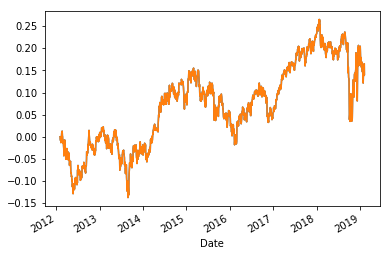

In [31]:
## "4. Analysis [codes and scripts]"

# Module Imports
from scipy import stats
from scipy.stats import skew, kurtosis
import numpy as np

# TODO: PULL data from POSTGRES

# POSTGRES Operations

# Analysis: https://www.investopedia.com/terms/a/adjusted_closing_price.asp

## Basic Descriptive Stats ----------------------------------------------------------------------------
# Daily Returns of Adjusted Close Prices
df_INDA['Returns'] = df_INDA.AdjClose.pct_change() # df_INDA['Returns'].head(2) #check
df_INCO['Returns'] = df_INCO.AdjClose.pct_change() # df_INCO['Returns'].head(2) #check
# Mean/Average Daily Returns
mu_INDA = np.mean(df_INDA['Returns']) # print(mu_INDA) #check
mu_INCO = np.mean(df_INCO['Returns']) # print(mu_INCO) #check
# Averaged Annualized Return (assuming 252 trading days per year)
avgAnnual_INDA = ((1 + mu_INDA)**252) - 1 # print(avgAnnual_INDA) #check
avgAnnual_INCO = ((1 + mu_INCO)**252) - 1 # print(avgAnnual_INCO) #check
# Periodic Std Dev.
std_INDA = np.std(df_INDA['Returns']) # print(std_INDA) #check
std_INCO = np.std(df_INCO['Returns']) # print(std_INCO) #check
# Variance
var_INDA = std_INDA**2 # print(var_INDA) #check
var_INCO = std_INCO**2 # print(var_INCO) #check
## Scaling Volatility
# Annualized Volality of Returns
stdAnnual_INDA = std_INDA * np.sqrt(252) # print(stdAnnual_INDA) #check
stdAnnual_INCO = std_INCO * np.sqrt(252) # print(stdAnnual_INCO) #check
# Monthized Volality of Returns
stdMonthized_INDA = std_INDA * np.sqrt(21) # print(stdMonthized_INDA) #check
stdMonthized_INCO = std_INCO * np.sqrt(21) # print(stdMonthized_INCO) #check
# Skewness of Returns
skew_INDA = skew(df_INDA['Returns'].dropna()) # print(skew_INDA) #check
skew_INCO = skew(df_INCO['Returns'].dropna()) # print(skew_INCO) #check
# Kurtosis of Returns
kurtosis_INDA = kurtosis(df_INDA['Returns'].dropna()) # print(kurtosis_INDA) #check
kurtosis_INCO = kurtosis(df_INCO['Returns'].dropna()) # print(kurtosis_INCO) #check

## Testing: Shapiro-Wilk test
# The Null Hypothesis of the Shapiro-Wilk test is that the data is normally distributed.
shapiro_stats_INDA = stats.shapiro(df_INDA['Returns'].dropna()) # print(shapiro_stats_INDA) #check
shapiro_stats_INCO = stats.shapiro(df_INCO['Returns'].dropna()) # print(shapiro_stats_INCO) #check
p_val_INDA = stats.shapiro(df_INDA['Returns'].dropna())[1] # print(p_val_INDA) #check
p_val_INCO = stats.shapiro(df_INCO['Returns'].dropna())[1] # print(p_val_INCO) #check

if p_val_INDA <= 0.05:
    print(" Null hypothesis of normality is Rejected. ")
    print(" Data is Not Normally Distributed. ")
else:
    print(" Null hypothesis of normality is Accepted. ")
    print(" Data is Normally Distributed. ")
    
if p_val_INCO <= 0.05:
    print(" Null hypothesis of normality is Rejected. ")
    print(" Data is Not Normally Distributed. ")
else:
    print(" Null hypothesis of normality is Accepted. ")
    print(" Data is Normally Distributed. ")

## Portfolio Returns -----------------------------------------------------------------------

# Create Portfolio DataFrame
df_EtfPortfolios = pd.DataFrame()

# def cumulative_returns_plot(alist[]):

# Custom weighted Portfolio
port_weights = np.array([0.75, 0.25])
# Calculate the weighted stock returns
portfolio_returns = df_EtfReturns.mul(portfolio_weights, axis=1)
# Calculate the portfolio returns
df_EtfPortfolios['Portfolio'] = portfolio_returns.sum(axis=1)
# Calculate cumulative portfolio returns over time
portfolio_CuRets = ((1+df_EtfPortfolios["Portfolio"]).cumprod()-1)

# Equal weighted portfolio
numstocks = 2 # How many stocks are in your portfolio?
# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# Calculate the equally-weighted portfolio returns
df_EtfPortfolios['Portfolio_EW'] = df_EtfReturns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
# Calculate cumulative portfolio returns over time
portf_ew_CuRets =  ((1+df_EtfPortfolios["Portfolio_EW"]).cumprod()-1)

# Market Cap. weighted portfolio (for ETFs this would be AUM)
# Create an array of market capitalizations (in millions) [from etfdb.com on 9th Feb 2019]
aum_capitalizations = np.array([4,712.9, 131.9])
# Calculate the market cap weights
aum_weights = aum_capitalizations/np.sum(aum_capitalizations)
# Calculate the market cap weighted portfolio returns
df_EtfPortfolios['Portfolio_AUM'] = df_EtfReturns.iloc[:, 0:2].mul(aum_weights, axis=1).sum(axis=1)
# Calculate cumulative portfolio returns over time
portf_aum_CuRets =  ((1+df_EtfPortfolios["Portfolio_AUM"]).cumprod()-1)


# TODO: CREATE copy of analysis file and PUSH to "4. Analysis [codes and scripts]"



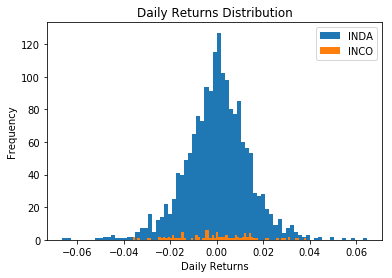

In [27]:
## "5. Insights [prelim insights]"

import matplotlib.pyplot as plt

# TODO: PULL data from POSTGRES

# POSTGRES Operations

# Visualize with Tableau or Matplotlib or both
    # Establish Server if with Tableau
# print(df_INDA.columns)
plt.hist(df_INDA.Returns.dropna(), bins=75, density=False)
plt.hist(df_INCO.Returns.dropna(), bins=75, density=False)
plt.legend(labels=['INDA', 'INCO'])
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()


    
# TODO: CREATE copy of viz file and PUSH to "5. Insights [prelim insights]"

In [37]:
import seaborn as sns
sns.set()
sns.lineplot(x="time", y="value", data=df_EtfPortfolios)



AttributeError: module 'seaborn' has no attribute 'lineplot'